## The efficiency of using the historical standard deviation
### 09.04.19

In [2]:
# сonnect the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# get data
MICEX = pd.read_csv('https://raw.githubusercontent.com/Aurilino/Diploma/master/MAIN_DATA/MOEX.csv'
                    , header=0, index_col=0, parse_dates={'Date': [0]}, sep=';')
main = pd.DataFrame(MICEX.iloc[6:, 3])
# get daily returns
main = main.apply(lambda x: np.log(x)-np.log(x).shift(1))
main.dropna(inplace = True)
main.head()

,CLOSE
Date,
2012-12-01,-0.000642
2012-01-13,-0.000752
2012-01-16,0.000673
2012-01-17,0.014862
2012-01-18,0.004937


In [59]:
years= int(len(main.index) / 252)
first_year = 1
day_s = 0
day_f = 253
ind = []
means = []
std = []
for year in range(years):
    ind.append(first_year)
    first_year += 1
    temp = pd.DataFrame(main.iloc[day_s:day_f, :])
    means.append(np.mean(temp['CLOSE']) * 252)
    std.append(np.std(temp['CLOSE']) * np.sqrt(252))
    day_s += 252
    day_f += 252

In [61]:
summary = dict(MEAN = means, STD = std)
summary = pd.DataFrame(summary)
summary

,MEAN,STD
0,0.075731,0.195791
1,0.024951,0.158926
2,0.134644,0.243983
3,0.090620,0.201566
4,0.324670,0.144388
5,0.103006,0.132988
6,0.126827,0.170483


In [74]:
zZ = summary.iloc[0, 0]
xX = summary.iloc[0, 1]
diff_mean = [i / zZ for i in summary.iloc[1:, 0]]
diff_std = [i / xX for i in summary.iloc[1:, 1]]

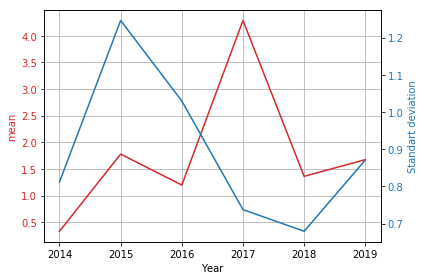

In [84]:
_=fig, ax1 = plt.subplots()
_=plt.grid(True)
_=color = 'tab:red'
_=ax1.set_xlabel('Year')
_=ax1.set_ylabel('mean', color=color)
_=ax1.plot(range(2014, 2020), diff_mean, color=color)
_=ax1.tick_params(axis='y', labelcolor=color)
_=ax2 = ax1.twinx()  
_=color = 'tab:blue'
_=ax2.set_ylabel('Standart deviation', color=color)  
_=ax2.plot(range(2014, 2020), diff_std, color=color)
_=ax2.tick_params(axis='y', labelcolor=color)
_=fig.tight_layout()  

In [82]:
np.corrcoef(diff_mean, diff_std)[1, 0]

-0.1856308730977159